In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [9]:
#Load database
df=pd.read_excel("Gold rate.xlsx")


In [10]:
#To get No of rows and columns
df.shape 

(5420, 3)

In [11]:
#To get top  5 records and verify whether format is correct.
df.head()


,date,22k,24k
0,2006-01-01 18:30:00,711.00,768.00
1,2006-01-02 18:30:00,713.00,770.50
2,2006-01-03 18:30:00,726.00,784.50
3,2006-01-04 18:30:00,725.00,782.50
4,2006-01-05 18:30:00,719.00,776.00


In [12]:
#To get information of the data like no of rows,columns,elements in columns,whether the data contain null values and the datatype of the columns.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420 entries, 0 to 5419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5420 non-null   datetime64[ns]
 1   22k     5420 non-null   object        
 2   24k     5420 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 127.2+ KB


In [13]:
#The Na values are removed. Since we don't have any null values.No value is removed.
df.dropna()


,date,22k,24k
0,2006-01-01 18:30:00,711.00,768.00
1,2006-01-02 18:30:00,713.00,770.50
2,2006-01-03 18:30:00,726.00,784.50
3,2006-01-04 18:30:00,725.00,782.50
4,2006-01-05 18:30:00,719.00,776.00
...,...,...,...
5415,2023-12-07 18:30:00,5835.00,6305.00
5416,2023-12-08 18:30:00,5765.00,6235.00
5417,2023-12-09 18:30:00,5765.00,6235.00
5418,2023-12-10 18:30:00,5750.00,6220.00


In [14]:
#To checking the datatype
df['22k'].dtypes

dtype('O')

In [15]:
#Changing the datatype from object to float
df['22k'] = df['22k'].str.replace(',', '').astype(float)
df['24k'] = df['24k'].str.replace(',', '').astype(float)

In [16]:
#To checking the datatype
print(df['22k'].dtypes)
print(df['24k'].dtypes)

float64
float64


#Columns Names
df.columns

In [17]:
# gives all the statistical measures related to various columns
df.describe()


,date,22k,24k
count,5420,5420.000000,5420.000000
mean,2014-11-20 08:36:11.955719680,2805.482749,3004.246218
min,2006-01-01 18:30:00,711.000000,768.000000
25%,2010-06-22 12:30:00,1713.750000,1842.625000
50%,2014-06-10 06:30:00,2696.000000,2872.000000
75%,2020-01-01 00:30:00,3744.750000,3924.500000
max,2023-12-11 18:30:00,5975.000000,6445.000000
std,NaN,1377.969709,1482.616287


In [125]:
#Extracting for a specific columns
df[['22k','24k']].describe()

,22k,24k
count,5420.000000,5420.000000
mean,2805.482749,3004.246218
std,1377.969709,1482.616287
min,711.000000,768.000000
25%,1713.750000,1842.625000
50%,2696.000000,2872.000000
75%,3744.750000,3924.500000
max,5975.000000,6445.000000


# Exploratory Data Analysis

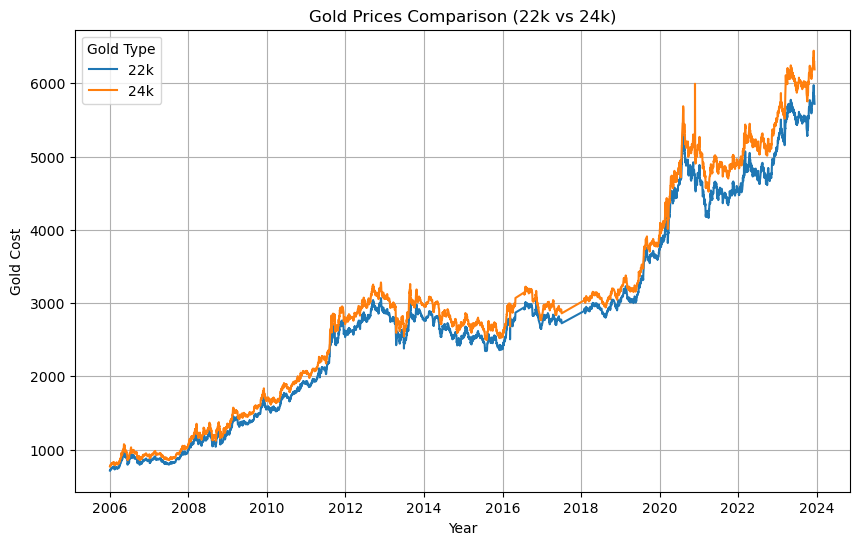

In [18]:
#trend in cost of gold of 22k and 24k gold from 02-01-2006 to 12-12-2023

date_column='date'
gold_22k_column='22k'
gold_24k_column='24k'


df_long=pd.melt(df,id_vars=[date_column],value_vars=[gold_22k_column,gold_24k_column],var_name='Gold Type',value_name='Gold Cost')


plt.figure(figsize=(10,6))
sns.lineplot(x='date',y='Gold Cost',hue='Gold Type',data=df_long)
plt.title('Gold Prices Comparison (22k vs 24k)')
plt.xlabel('Year')
plt.ylabel('Gold Cost')
plt.grid(True)


Enter the year to analyze: 2006


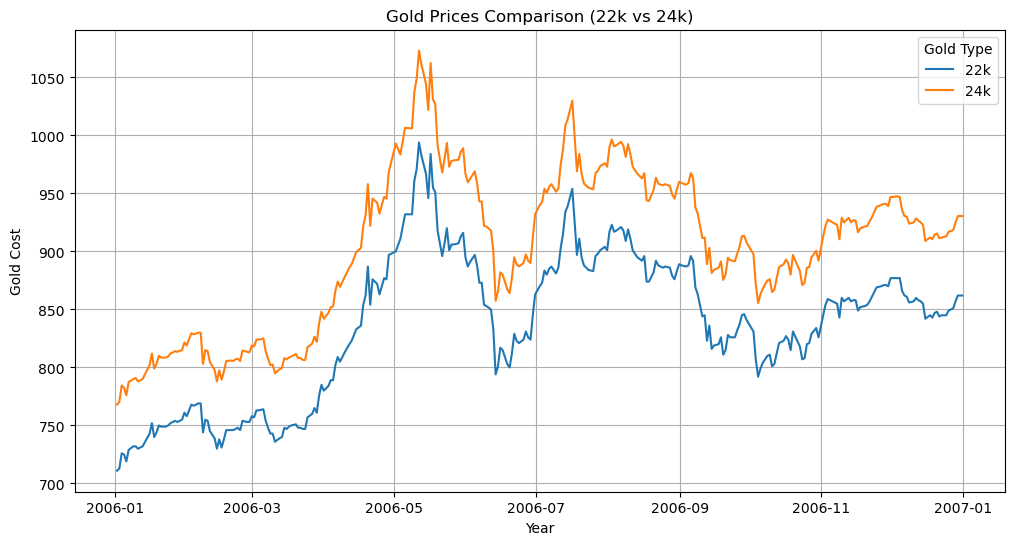

In [30]:
#The trend of the 22k and 24k gold in particular year by taking the year as input
date_column='date'
gold_22k_column='22k'
gold_24k_column='24k'

df['date']=pd.to_datetime(df['date'])
df_long=pd.melt(df,id_vars=[date_column],value_vars=[gold_22k_column,gold_24k_column],var_name='Gold Type',value_name='Gold Cost')
analysis_year=int(input("Enter the year to analyze:"))
df_year=df_long[df_long[date_column].dt.year==analysis_year]
plt.figure(figsize=(12,6))



sns.lineplot(x='date',y='Gold Cost',hue='Gold Type',data=df_year)
plt.title('Gold Prices Comparison (22k vs 24k)')
plt.xlabel('Year')
plt.ylabel('Gold Cost')
plt.grid(True)


Enter the start date (YYYY-MM-DD): 01-12-2021
Enter the end date: (YYYY-MM-DD): 01-12-2023


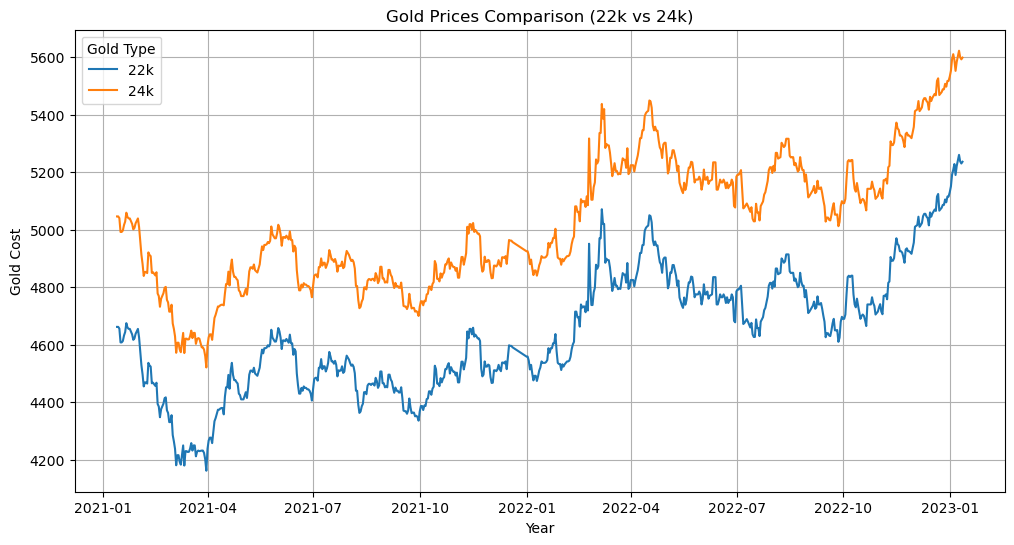

In [32]:
#The trend of the 22k and 24k gold between dates by taking the dates as input
date_column='date'
gold_22k_column='22k'
gold_24k_column='24k'

df['date']=pd.to_datetime(df['date'])
df_long=pd.melt(df,id_vars=[date_column],value_vars=[gold_22k_column,gold_24k_column],var_name='Gold Type',value_name='Gold Cost')

start_date_input=input("Enter the start date (YYYY-MM-DD):")
end_date_input=input("Enter the end date: (YYYY-MM-DD):")

start_date=pd.to_datetime(start_date_input)
end_date=pd.to_datetime(end_date_input)


df_long_range=df_long[(df_long[date_column]>=start_date) & (df_long[date_column]<=end_date) ]

plt.figure(figsize=(12,6))

sns.lineplot(x='date',y='Gold Cost',hue='Gold Type',data=df_long_range)
plt.title('Gold Prices Comparison (22k vs 24k)')
plt.xlabel('Year')
plt.ylabel('Gold Cost')
plt.grid(True)

                  

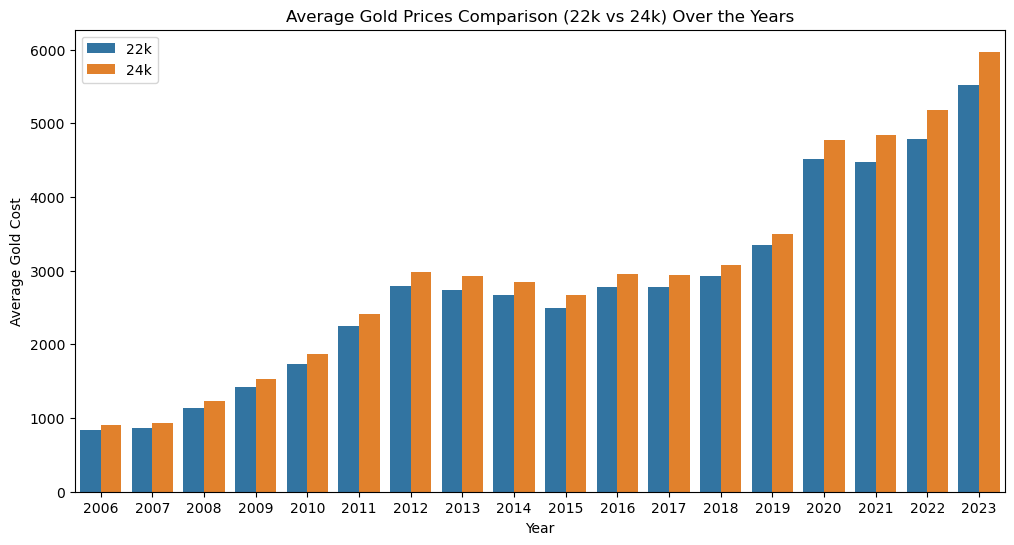

In [27]:
#Average yearly analysis from 2006 to 2023
date_column = 'date'
gold_22k_column = '22k'
gold_24k_column = '24k'

df[date_column]=pd.to_datetime(df[date_column])
avergae_costs=df.groupby('Year')[[gold_22k_column,gold_24k_column]].mean().reset_index()
average_costs_long = pd.melt(average_costs, id_vars=['Year'], 
                             value_vars=[gold_22k_column, gold_24k_column],
                             var_name='Gold Type', value_name='Average Gold Cost')

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Average Gold Cost', hue='Gold Type', data=average_costs_long)

plt.title('Average Gold Prices Comparison (22k vs 24k) Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Gold Cost')
plt.legend()
plt.show()





Enter the year for analysis:  2009


C:\Users\giris\AppData\Local\Temp\ipykernel_3556\1608948245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearly['Month'] = df_yearly[date_column].dt.month


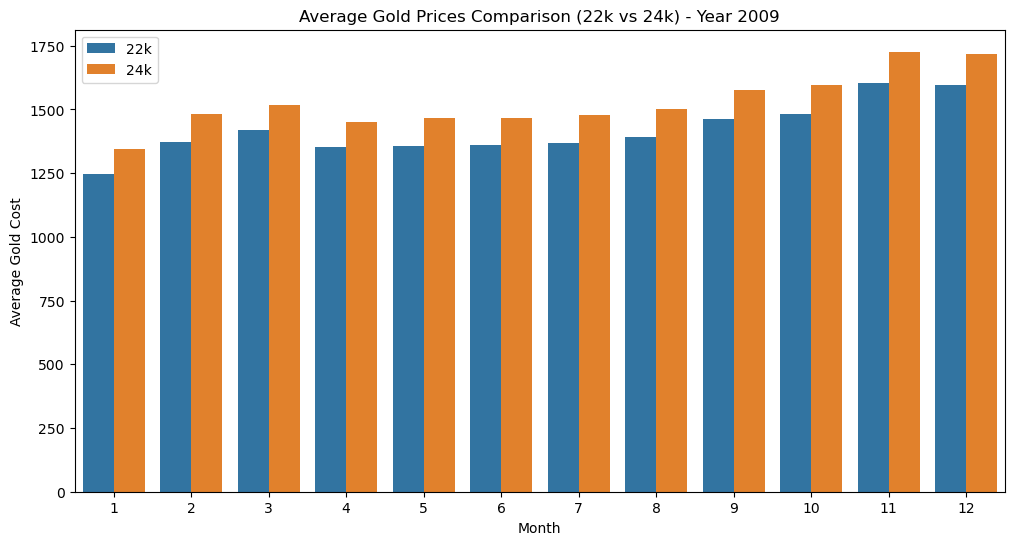

In [34]:
#average Monthly trend of the inputed year.
date_column = 'date'
gold_22k_column = '22k'
gold_24k_column = '24k'
df[date_column] = pd.to_datetime(df[date_column])
year_input = int(input("Enter the year for analysis: "))
df_yearly = df[df[date_column].dt.year == year_input]
df_yearly['Month'] = df_yearly[date_column].dt.month
average_costs_by_month = df_yearly.groupby('Month')[[gold_22k_column, gold_24k_column]].mean().reset_index()
average_costs_by_month_long = pd.melt(average_costs_by_month, id_vars=['Month'], 
                                      value_vars=[gold_22k_column, gold_24k_column],
                                      var_name='Gold Type', value_name='Average Gold Cost')

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Average Gold Cost', hue='Gold Type', data=average_costs_by_month_long)

plt.title(f'Average Gold Prices Comparison (22k vs 24k) - Year {year_input}')
plt.xlabel('Month')
plt.ylabel('Average Gold Cost')
plt.legend()
plt.show()

